<a href="https://colab.research.google.com/github/aytekin827/TIL/blob/main/%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0_%ED%8A%9C%ED%86%A0%EB%A6%AC%EC%96%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.tensorflow.org/tutorials/quickstart/beginner?hl=ko

In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.12.0


In [ ]:
 mnist = tf.keras.datasets.mnist

 (x_train, y_train), (x_test, y_test) = mnist.load_data()
 x_train, x_test = x_train/255.0, x_test/255.0

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(y_train[0])

(60000, 28, 28)
(60000,)
5


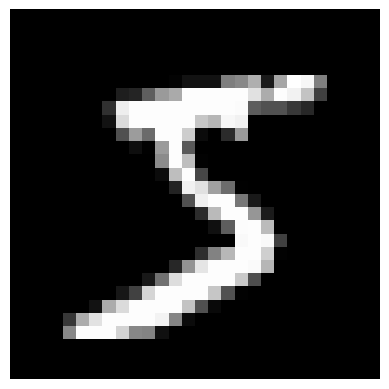

0번째 훈련데이터 정답 : 5


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.imshow(x_train[0], cmap=cm.gray)
plt.axis('off')
plt.show()

print('0번째 훈련데이터 정답 :', y_train[0])

# 머신러닝 모델 빌드

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
predictions = model(x_train[:1]).numpy()
predictions

array([[0.19055085, 0.1216677 , 0.08560269, 0.13366705, 0.07725433,
        0.03573426, 0.06968816, 0.09697691, 0.08369301, 0.105165  ]],
      dtype=float32)

In [ ]:
tf.nn.softmax(predictions).numpy()

array([[0.10938995, 0.10210849, 0.09849156, 0.10334111, 0.09767275,
        0.0937004 , 0.09693652, 0.09961823, 0.09830365, 0.10043725]],
      dtype=float32)

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
loss_fn(y_train[:1], predictions).numpy()

2.367653

In [ ]:
model.fit(x_train, y_train, epochs=5) # 기본 batch size는 32 인듯

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2937 - accuracy: 0.9164
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1429 - accuracy: 0.9574
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1077 - accuracy: 0.9671
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0871 - accuracy: 0.9736
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0754 - accuracy: 0.9775


In [ ]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0753 - accuracy: 0.9782 - 435ms/epoch - 1ms/step


[0.07526145130395889, 0.9782000184059143]

In [ ]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [ ]:
np.argmax(probability_model(x_test[:1]))

7

---

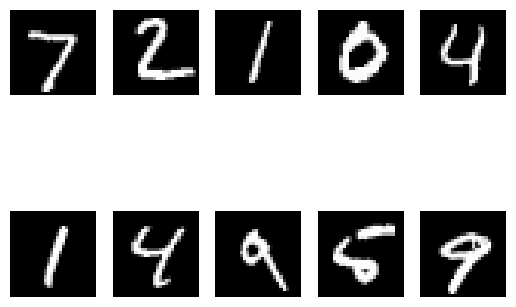

In [ ]:
# 테스트데이터셋 10개 눈으로 확인
for i, img in enumerate(x_test[:10]):
    plt.subplot(2,5,i+1)
    plt.imshow(img, cmap=cm.gray)
    plt.axis('off')
plt.show()

In [ ]:
# 테스트데이터셋 예측값 확인

import numpy as np

predict_list = [np.argmax(i) for i in probability_model(x_test[:10])]
for label, pred in zip(y_test[:10], predict_list):
    print(label==pred, label, pred)

True 7 7
True 2 2
True 1 1
True 0 0
True 4 4
True 1 1
True 4 4
True 9 9
True 5 5
True 9 9


# 이미지 분류

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228813984/228813984 [==============================] - 2s 0us/step


In [3]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


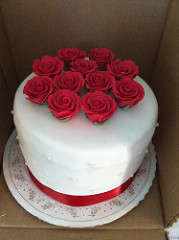

In [4]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

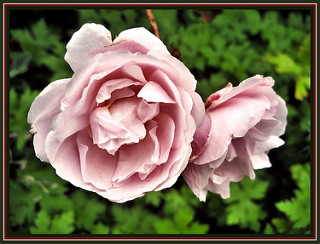

In [5]:
PIL.Image.open(str(roses[1]))

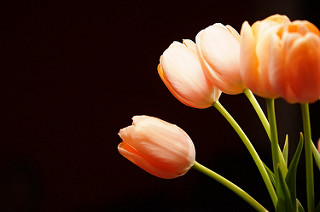

In [6]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

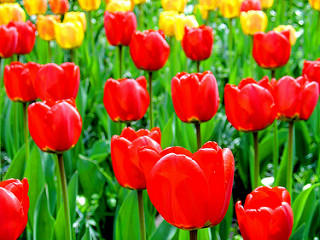

In [7]:
PIL.Image.open(str(tulips[1]))

## 데이터세트 만들기`

In [8]:
batch_size = 32
img_height = 180
img_width = 180

In [9]:
# 검증 분할 세트 분류
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [10]:
data_dir

PosixPath('/root/.keras/datasets/flower_photos')

In [11]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


## 데이터 시각화하기

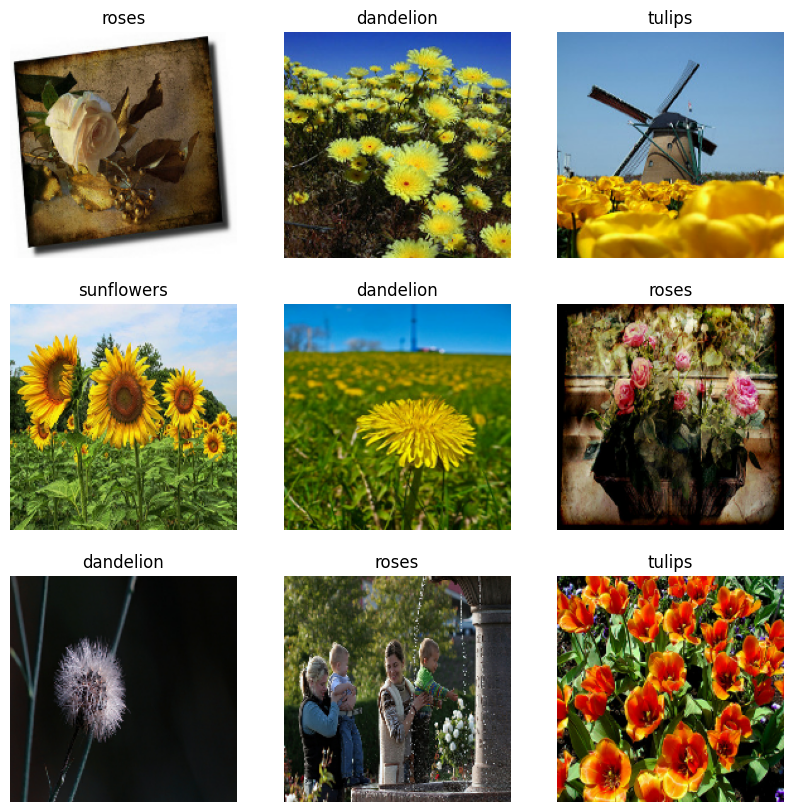

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [13]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)
